# Install and upgrade libraries

In [3]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 4.0 MB/s eta 0:00:00


In [1]:
import nltk

nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# Import data

In [5]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


pd.set_option('display.max_colwidth', None)


In [7]:
query = "(from:elonmusk) until:2022-12-15 since:2010-01-01"
tweets = []
limit = 1

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
  if len(tweets) == limit:
    break
  else:
    tweets.append([tweet.date, tweet.username, tweet.content, tweet.likeCount, tweet.retweetCount])



ERROR:snscrape.base:Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&include_ext_has_nft_avatar=1&include_ext_is_blue_verified=1&include_ext_verified_type=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_ext_limited_action_results=false&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_ext_collab_control=true&include_ext_views=true&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&include_ext_sensitive_media_warning=true&include_ext_trusted_friends_metadata=true&send_error_codes=true&simple_quoted_tweet=true&q=%28from%3Aelonmusk%29+until%3A2022-12-15+since%3A2010-01-01&tweet_search_mode=live&count=20&query_source=spelling_expansion_revert_click&pc=1&spelling_correct

ScraperException: ignored

In [ ]:
df = pd.DataFrame(tweets, columns=['date', 'user', 'tweet', 'likes', 'retweets'] )

# Sort by likes

In [ ]:
df.sort_values(by='likes', ascending=False)

,date,user,tweet,likes,retweets
95,2022-12-12 19:46:04+00:00,elonmusk,😛 https://t.co/X8Y1YEuS3C,763544,59592
80,2022-12-13 01:15:20+00:00,elonmusk,Follow 🐰,437057,38047
96,2022-12-12 19:36:52+00:00,elonmusk,"Under pressure from hundreds of activist employees, Twitter deplatforms Trump, a sitting US President, even though they themselves acknowledge that he didn’t violate the rules: https://t.co/60PplztV4k",345101,75665
45,2022-12-13 23:21:58+00:00,elonmusk,"At risk of stating obvious, beware of debt in turbulent macroeconomic conditions, especially when Fed keeps raising rates",267012,27276
27,2022-12-14 04:19:49+00:00,elonmusk,"You can play Cyberpunk, Elden Ring and 1000s of other games in your *car* with an epic sound system!! https://t.co/F25Qu6HJ63",219874,16746
...,...,...,...,...,...
12,2022-12-14 10:12:55+00:00,elonmusk,"@SirGrantFleming @conexaopolitica @VitalikButerin Agreed, I thought the same!",2862,119
40,2022-12-14 03:13:27+00:00,elonmusk,"@babylonmovie Basically, a Twitter documentary",2429,180
54,2022-12-13 21:11:06+00:00,elonmusk,@wintonARK @NewsNancy9 @TomFitton Good thread,2321,161
48,2022-12-13 23:10:28+00:00,elonmusk,"@HarryStebbings Main reason is that the Starlink value proposition is “better Internet for less money” for most people in low population density areas, which is compelling no matter how the economy is doing",2237,190


### List of all people mentioned by username

In [ ]:
mentions_list = [k for k in flat_list if '@' in k]

In [ ]:
mentions_list = [f'{x[1:]}' for x in mentions_list]

In [ ]:
mentions_dict = {}

In [ ]:
for person in mentions_list:
  if person in mentions_dict.keys():
    mentions_dict[person] += 1
  else:
    mentions_dict[person] = 1

In [ ]:
mentions_df = pd.DataFrame.from_dict(mentions_dict, orient='index', columns=['mentions'])

In [ ]:
mentions_df['name'] = mentions_df.index
mentions_df = mentions_df.reset_index(drop=True)
mentions_df = mentions_df[['name', 'mentions']]

In [ ]:
mentions_df.sort_values(by='mentions', ascending=False)

,name,mentions
22,BillyM2k,17
17,WholeMarsBlog,4
15,VitalikButerin,4
12,hodgetwins,4
62,RVAwonk,3
...,...,...
42,JeffBezos,1
43,washingtonpost,1
44,WatcherGuru,1
45,AndrewYang,1


# make all words in list lowercase and remove stop words

In [ ]:
flat_list = [word.lower() for word in flat_list]


In [ ]:
stops = stopwords.words('english')

In [ ]:
stops.append('&amp;')

In [ ]:
stops.append('it’s')

In [ ]:
flat_list = [word for word in flat_list if word not in stops]

In [ ]:
words = pd.Series(flat_list)

In [ ]:
word_counts = words.value_counts()

In [ ]:
temp_list_mentions = [k for k in flat_list if '@' in k]

word_count_wo_mentions = []

for word in words:
  if word in temp_list_mentions:
    pass
  else:
    word_count_wo_mentions.append(word)


In [ ]:
word_count_wo_mentions = pd.Series(word_count_wo_mentions)

In [ ]:
word_count_wo_mentions.value_counts()

twitter     6
wow         4
exactly     3
think       3
lol         3
           ..
obvious,    1
stating     1
risk        1
benefit     1
glass       1
Length: 347, dtype: int64

# Vader Sentiment Analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
sendf = df[['likes', 'tweet']]
sendf.reset_index(inplace=True, drop=True)

In [ ]:
sid = SentimentIntensityAnalyzer()
sendf[['neg', 'neu', 'pos', 'compund']] = sendf['tweet'].apply(sid.polarity_scores).apply(pd.Series)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
vader_df = sendf.sort_values(by='likes', ascending=False).reset_index()

In [ ]:
## sentiment of top n tweets
n = 1000

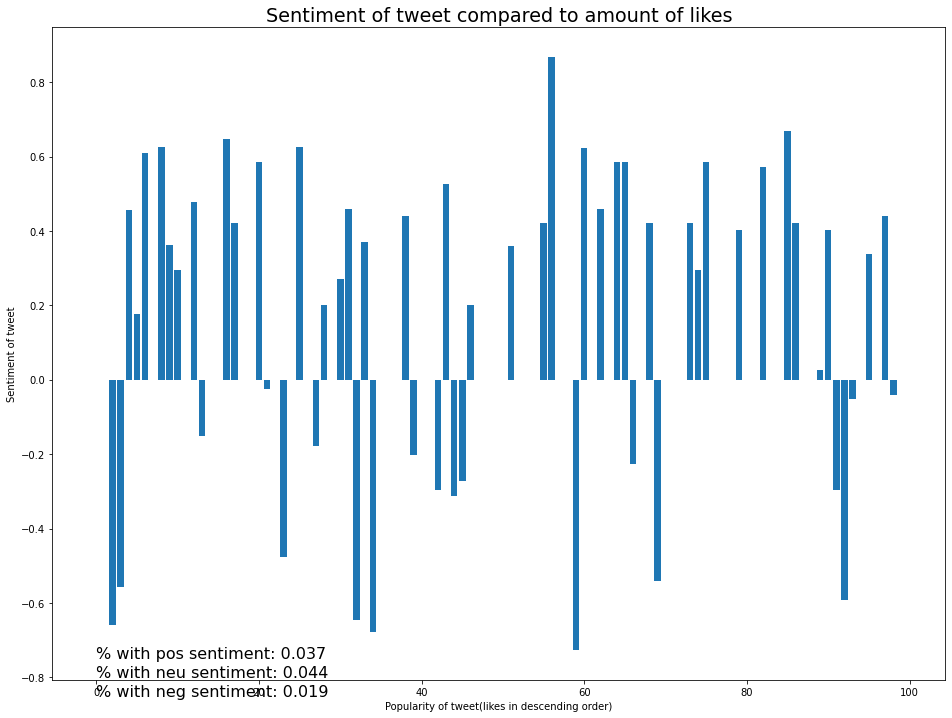

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
plt.rc('font', size=16)
plt.rc('axes', labelsize=16)

p1= ax.bar(
    x = vader_df[0:n].index,
    height = vader_df[0:n]['compund'],
    data=vader_df[0:n]
)

ax.set_title('Sentiment of tweet compared to amount of likes')
ax.set_ylabel('Sentiment of tweet')
ax.set_xlabel('Popularity of tweet(likes in descending order)')

#ax.bar_label(p1, label_type='edge')

plt.text(0,-0.75, f'% with pos sentiment: {len(vader_df[0:n].loc[vader_df[0:n]["compund"] > 0]) / n}')
plt.text(0,-0.8, f'% with neu sentiment: {len(vader_df[0:n].loc[vader_df[0:n]["compund"] == 0]) / n}')
plt.text(0,-0.85, f'% with neg sentiment: {len(vader_df[0:n].loc[vader_df[0:n]["compund"] < 0]) / n}')



plt.show()


# Roberta sentiment analysis

In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
df

# tweets of top accounts

In [ ]:
top_users = ['BarackObama', 'elonmusk', 'justinbieber', 'katyperry', 'rihanna', 'Cristiano', 'taylorswift13', 'narendramodi', 'ladygaga']

In [ ]:
for user in top_users:
  print(user)

BarackObama
elonmusk
justinbieber
katyperry
rihanna
Cristiano
taylorswift13
narendramodi
ladygaga


In [ ]:
tweets = []

for user in top_users:
  query = f"(from:{user}) until:2022-12-15 since:2010-01-01"
  limit = 100
  temp_tweets = []

  for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(temp_tweets) == limit:
      break
    else:
      temp_tweets.append([tweet.date, tweet.username, tweet.content, tweet.likeCount, tweet.retweetCount])
      tweets.append([tweet.date, tweet.username, tweet.content, tweet.likeCount, tweet.retweetCount])




<ipython-input-25-51066972098b>:12: FutureWarning: username is deprecated, use user.username instead
  temp_tweets.append([tweet.date, tweet.username, tweet.content, tweet.likeCount, tweet.retweetCount])
<ipython-input-25-51066972098b>:13: FutureWarning: username is deprecated, use user.username instead
  tweets.append([tweet.date, tweet.username, tweet.content, tweet.likeCount, tweet.retweetCount])


In [ ]:
df = pd.DataFrame(tweets, columns=['date', 'user', 'tweet', 'likes', 'retweets'])

In [ ]:
df.sort_values(by='likes', ascending=False)

In [ ]:
df['user'].value_counts()

BarackObama      100
elonmusk         100
justinbieber     100
katyperry        100
rihanna          100
Cristiano        100
taylorswift13    100
narendramodi     100
ladygaga         100
Name: user, dtype: int64

sentiment of top accounts

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
df_sen = df[['user','likes', 'tweet']]
df_sen.reset_index(inplace=True, drop=True)

In [ ]:
sid = SentimentIntensityAnalyzer()
df_sen[['neg', 'neu', 'pos', 'compund']] = df_sen['tweet'].apply(sid.polarity_scores).apply(pd.Series)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
df_sen = df_sen.sort_values(by='likes', ascending=False).reset_index()

In [ ]:
df_sen

,index,user,likes,tweet,neg,neu,pos,compund
0,573,Cristiano,2009310,Forever Love…❤️🙏🏽 https://t.co/x18W34rYRM,0.0,1.000,0.000,0.0000
1,426,rihanna,1904337,. https://t.co/7oCnFsZH5U,0.0,1.000,0.000,0.0000
2,576,Cristiano,1901437,https://t.co/vRNVCoegOW,0.0,1.000,0.000,0.0000
3,513,Cristiano,1751626,Victory is a State of Mind. A long tradition of crafting trunks photographed by @annieleibovitz for @LouisVuitton https://t.co/0TsieZP40P,0.0,1.000,0.000,0.0000
4,575,Cristiano,1657382,❤️ https://t.co/HLg0RbI8SM,0.0,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...
895,880,ladygaga,905,@JAYACTII We aim to be fully carbon neutral by 2027 and are on track as a company to achieve this goal.,0.0,1.000,0.000,0.0000
896,885,ladygaga,781,"@remdorito @alluregaga2 @hauslabs They are amazing, nourishing and some shades double as a lip stain!",0.0,0.761,0.239,0.6239
897,884,ladygaga,753,@mothamonstah @alluregaga2 @hauslabs And they’re packed with plant squalane and hyaluronic to hydrate lip cheek and eye area!,0.0,1.000,0.000,0.0000
898,816,ladygaga,574,@judenewland611 @hauslabs Look at that red carpet triclone beauty!,0.0,0.662,0.338,0.6239


In [ ]:
## sentiment of top n tweets
n = 800
## color map
c_map = {
    'BarackObama' : 'red', 'elonmusk': 'green', 'justinbieber':'blue', 'katyperry' : 'yellow', 'rihanna':'brown', 'Cristiano':'orange', 'taylorswift13':'purple', 'narendramodi':'pink', 'ladygaga':'white'

}

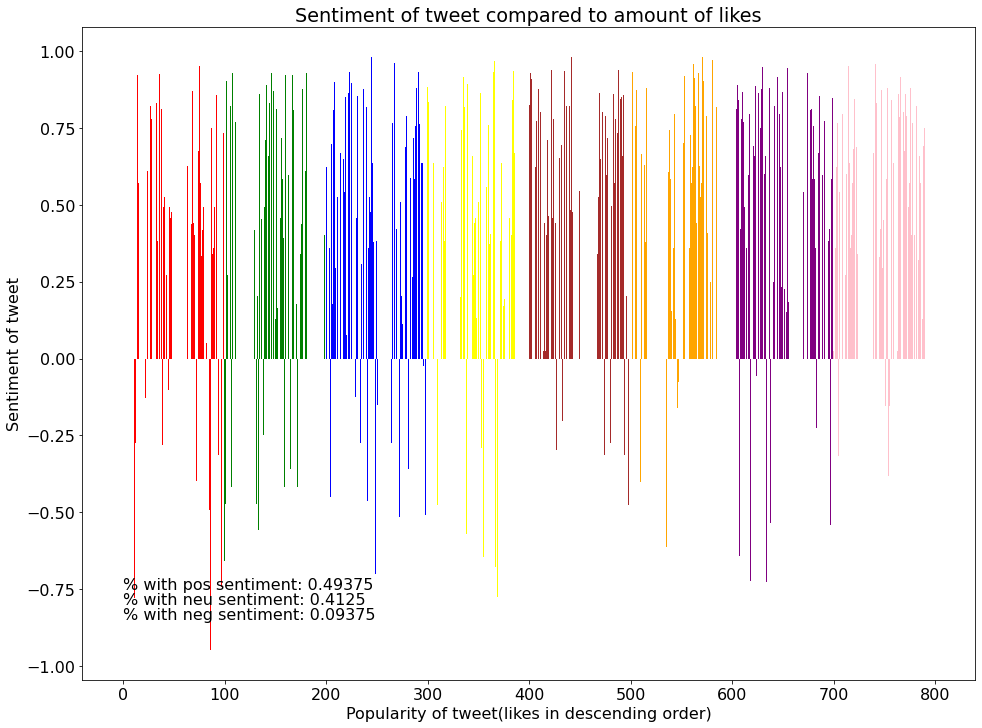

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
plt.rc('font', size=16)
plt.rc('axes', labelsize=16)

p1= ax.bar(
    x = df_sen[0:n].index,
    height = df_sen[0:n]['compund'],
    data=df_sen[0:n],
    color = [c_map[c] for c in df['user']]
)

ax.set_title('Sentiment of tweet compared to amount of likes')
ax.set_ylabel('Sentiment of tweet')
ax.set_xlabel('Popularity of tweet(likes in descending order)')

#ax.bar_label(p1, label_type='edge')

plt.text(0,-0.75, f'% with pos sentiment: {len(df_sen[0:n].loc[df_sen[0:n]["compund"] > 0]) / n}')
plt.text(0,-0.8, f'% with neu sentiment: {len(df_sen[0:n].loc[df_sen[0:n]["compund"] == 0]) / n}')
plt.text(0,-0.85, f'% with neg sentiment: {len(df_sen[0:n].loc[df_sen[0:n]["compund"] < 0]) / n}')



plt.show()


In [ ]:
df_sen.sort_values(by='compund')

,index,user,likes,tweet,neg,neu,pos,compund
86,630,taylorswift13,373221,"Filled with rage and grief, and so broken by the murders in Uvalde. By Buffalo, Laguna Woods and so many others. By the ways in which we, as a nation, have become conditioned to unfathomable and unbearable heartbreak. Steve’s words ring so true and cut so deep. https://t.co/Rb5uwSTxty",0.317,0.626,0.057,-0.9489
120,629,taylorswift13,285857,"About a year &amp; half ago I wrote a song about the story of a girl who always lived on the outside, looking in. Figuratively &amp; literally. The juxtaposition of her loneliness &amp; independence. Her curiosity &amp; fear all tangled up. Her persisting gentleness &amp; the world’s betrayal of it. https://t.co/2o1z8Hrht6",0.182,0.818,0.000,-0.8689
11,627,taylorswift13,827436,"I’m absolutely terrified that this is where we are - that after so many decades of people fighting for women’s rights to their own bodies, today’s decision has stripped us of that. https://t.co/mwK561oxxl",0.185,0.815,0.000,-0.7778
369,23,BarackObama,40353,We can and must do more to reduce gun violence in America. https://t.co/cfI3RIMLd2,0.381,0.619,0.000,-0.7759
97,639,taylorswift13,350674,One of the saddest songs I’ve ever written just got sadder 🙃Drove up to Long Pond Studios to record All Too Well (Sad Girl Autumn Version) with the besties @aaron_dessner @heyjonlow \n\nhttps://t.co/UnbELgJGAi https://t.co/Z1XK2zQkwf,0.187,0.759,0.053,-0.7430
...,...,...,...,...,...,...,...,...
581,745,narendramodi,15713,I bow to the great Subramania Bharathi on his Jayanti. ‘Mahakavi Bharathiar’ embodied remarkable courage and outstanding intellect. He had a grand vision for India’s development and the empowerment of every Indian. We are working to realise his ideas across different sectors.,0.000,0.590,0.410,0.9716
61,593,Cristiano,462975,"Life is a roller coaster. Hard work, high speed, urgent goals, demanding expectations… But in the end, it all comes down to family, love, honesty, friendship, values that make it all worth it. Thanks for all the messages! 37 and counting! ❤️🙏🏽 https://t.co/AoUgFiqVEy",0.043,0.538,0.419,0.9777
245,866,ladygaga,91726,"There was a time I thought I’d never be on stage again. I was so sad I couldn’t even dream anything but a painful nightmare. I’ve overcome my nightmare with love, support, trust, truth, bravery, talent and dedication. I am so grateful. I’ll see you in BABYLON. #ChromaticaBall",0.091,0.458,0.451,0.9803
442,836,ladygaga,28835,"It’s the way all the love makes feel. My love for you, your love for me, our love for each other. That’s real. And it’s big love. Forever love. 🖤 https://t.co/cCs7i39HSj",0.000,0.488,0.512,0.9803


# Compare likes and retweets